In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionLogisticRegression
from sklearn.preprocessing import StandardScaler
import pickle as pickle
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
data=pd.read_excel("/content/employee_burnout_analysis-AI.xlsx")

In [ ]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [ ]:
data.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [ ]:
data.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
data.isnull().sum().values.sum()

## Exploratory Data Analysis

In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:-1]


These two variables are strongly correlated with target variable, therefore , important to estimate it.

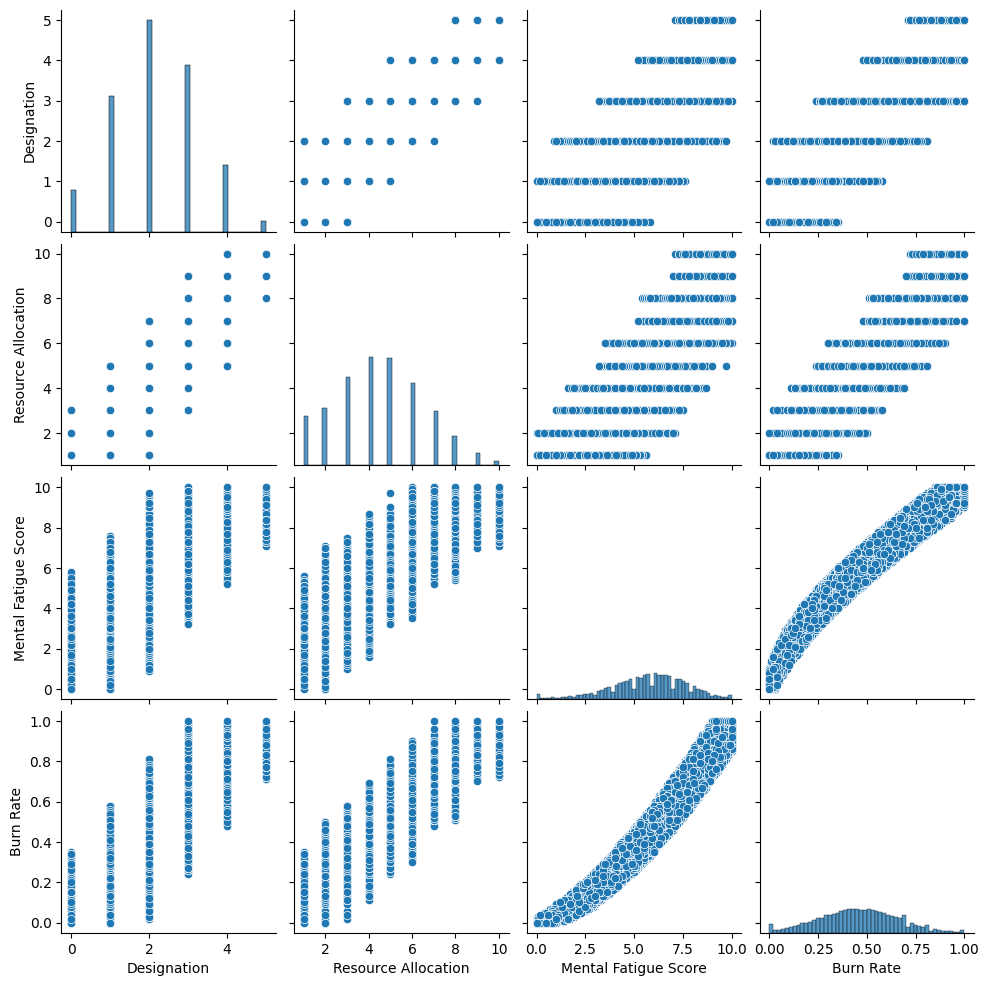

In [ ]:
sns.pairplot(data)
plt.show()

Drop off all observations with NaN values of our dataframe.

In [ ]:
data = data.dropna()


In [ ]:
data.shape

Analyzing what type of data is each variable.

In [ ]:
data.dtypes

 The values that each variable contains.

In [ ]:
data_obj = data.select_dtypes(object)
# prints a dictionary of max 10 unique values for each non-numeric column
pprint({ c : data_obj[c].unique()[:10] for c in data_obj.columns})




```
# This is formatted as code
```

 The employees ID doesn't provide any useful information and, therefore, they must be dropped.

In [ ]:
data = data.drop('Employee ID', axis = 1)


Checking the correlation of Date of Joining with Target variable

Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hired employees'>

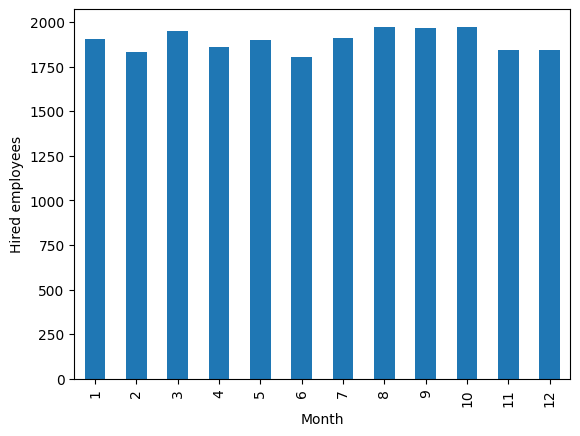

In [ ]:
print(f"Min date {data['Date of Joining'].min()}")
print(f"Max date {data['Date of Joining'].max()}")
data_month = data.copy()

data_month["Date of Joining"] = data_month['Date of Joining'].astype("datetime64[ns]")
data_month["Date of Joining"].groupby(
    data_month['Date of Joining'].dt.month
).count().plot(kind="bar", xlabel='Month', ylabel="Hired employees")

 The date of joining is uniform distributed with values between 2008-01-01 and 2008-12-31. So in order to create a new feature which represents the labor seniority, we could create a variable with de days worked

In [ ]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
data["Days"] = data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

0        273
1        334
2         69
3        307
4        205
        ... 
22745    364
22746     18
22747    309
22748      9
22749      5
Name: Days, Length: 22750, dtype: int64

In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:]

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Burn Rate               1.000000
Days                   -0.001358
Name: Burn Rate, dtype: float64

We observed that there is no strong correlation between Date of Joining and Burn Rate.So, we are dropping the column Date of Joining.

In [ ]:
data = data.drop(['Date of Joining','Days'], axis = 1)

In [ ]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Days
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16,273
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36,334
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49,69
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20,307
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52,205


Now  analysing the categorical variables

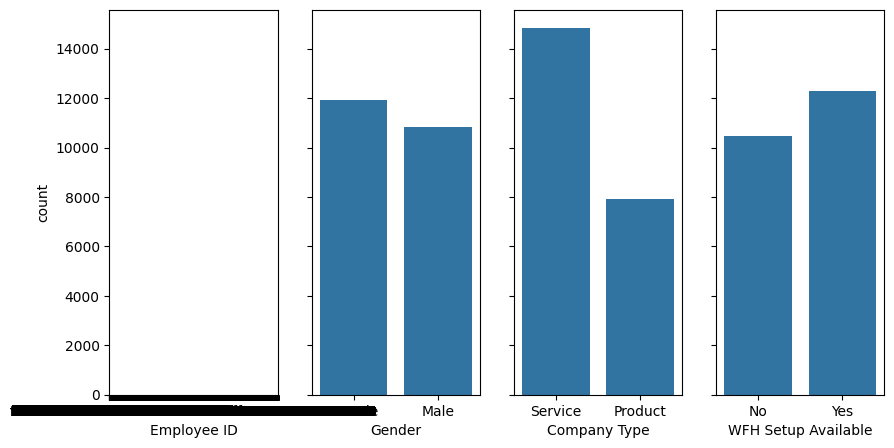

In [ ]:
cat_columns = data.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10, 5))
for i, c in enumerate(cat_columns):
    sns.countplot(x=c, data=data, ax=ax[i])
plt.show()


The number of observations of each category on each variable is equally distributed, except to the Company_Type where the number of service jobs its almost twice that of product ones.


ValueError: Image size of 1490x476531 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1499.12x1250 with 30 Axes>

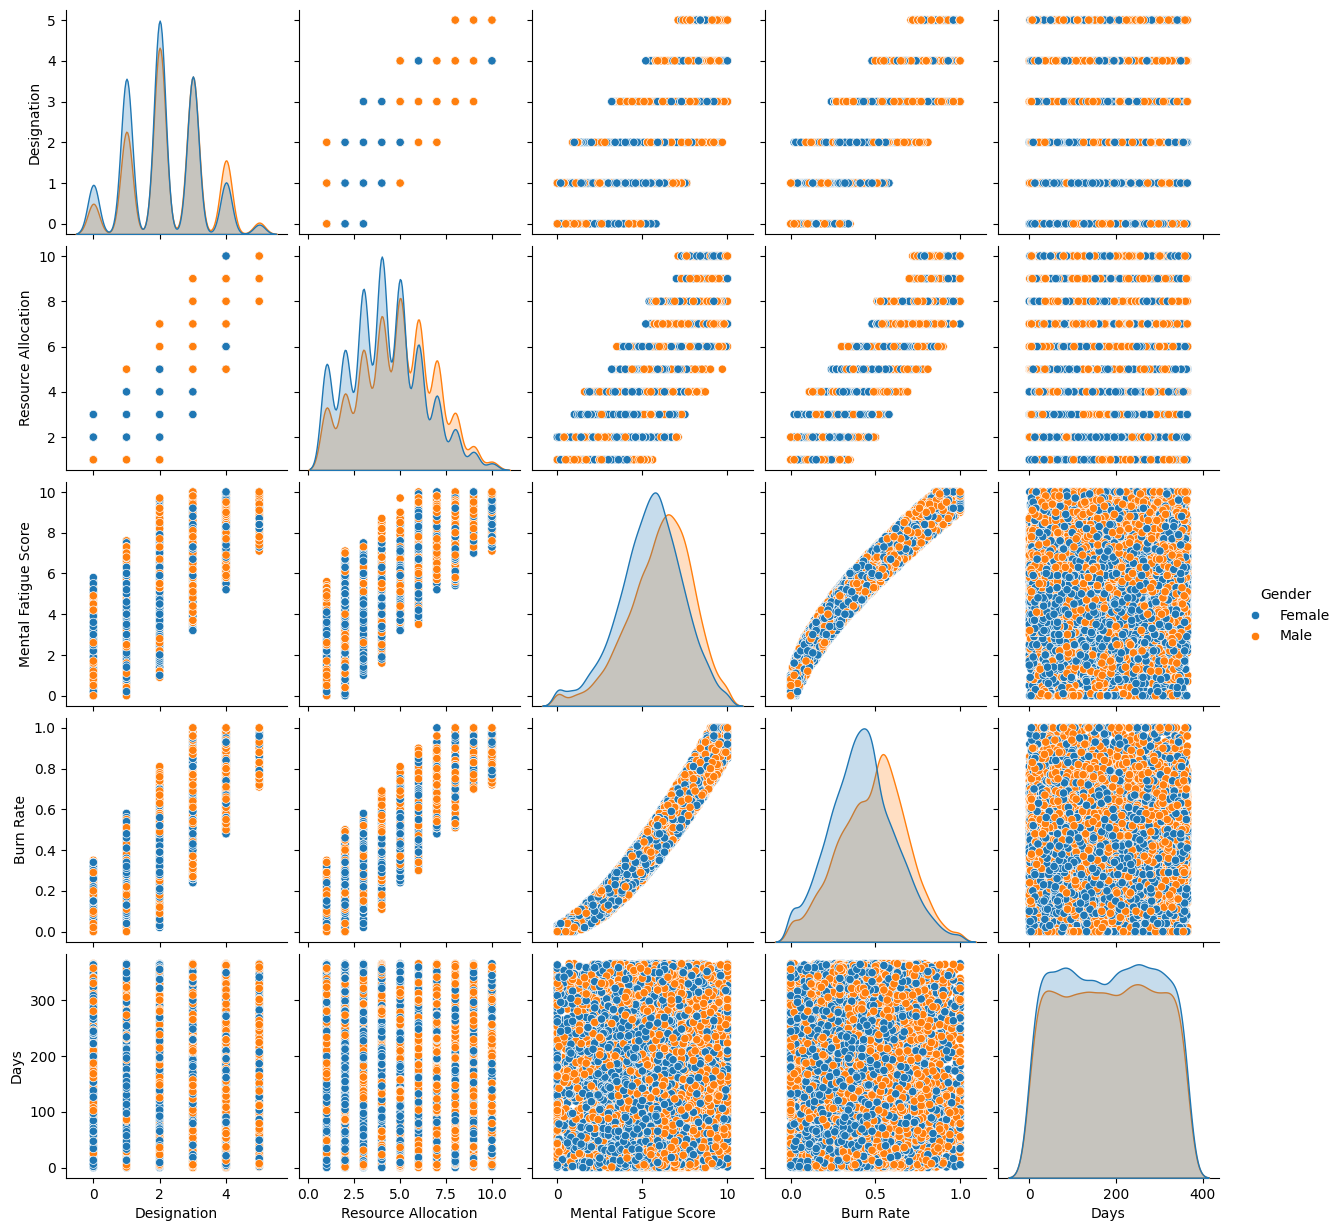

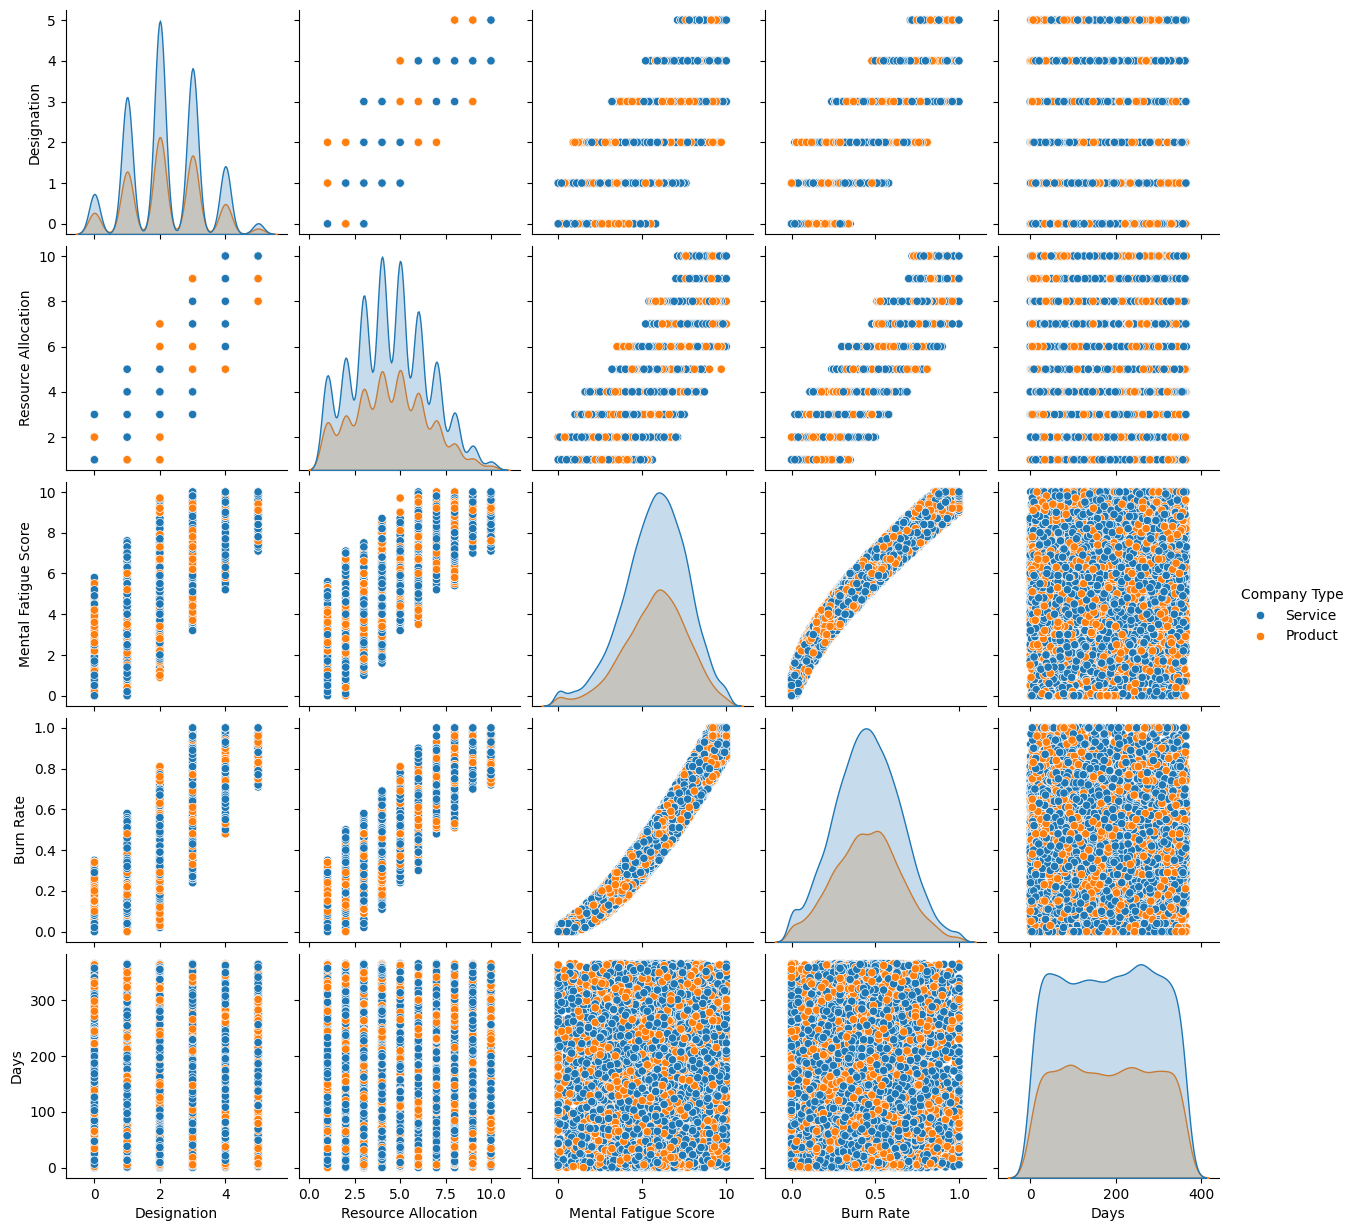

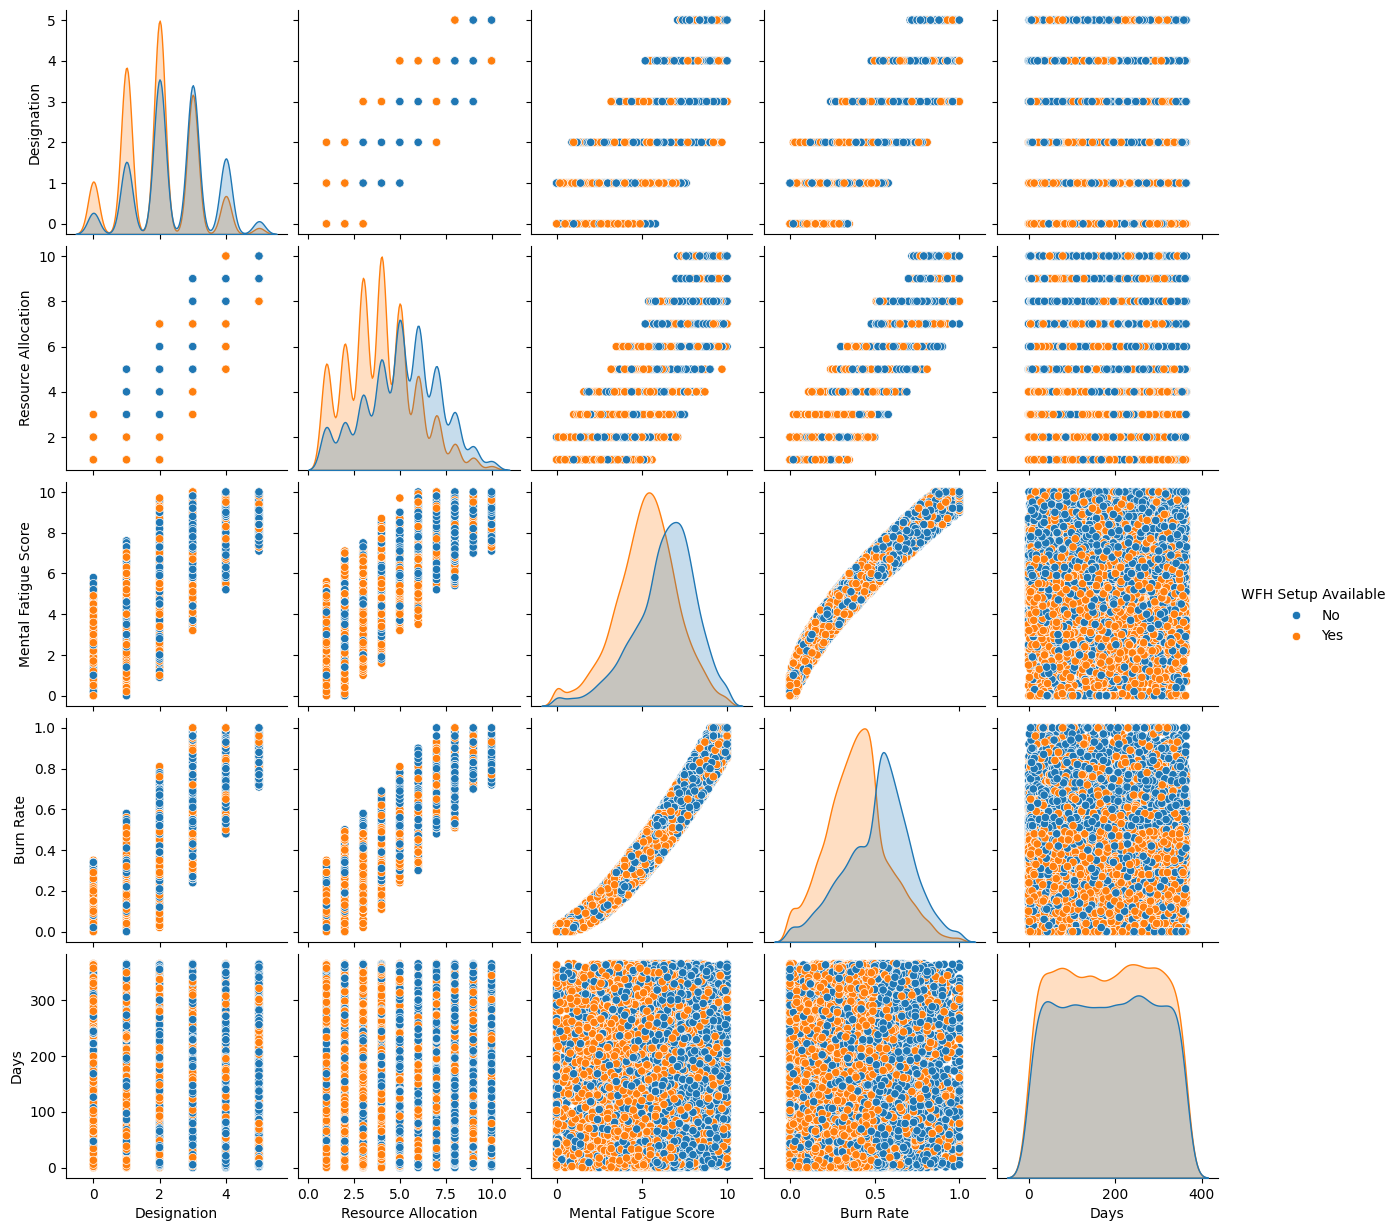

In [ ]:
for c in data.select_dtypes(object).columns:
    sns.pairplot(data, hue=c)
plt.show()

In [ ]:
data.columns

In [ ]:
data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available',
       'Gender'], drop_first=True)
data.head()
encoded_columns = data.columns



# Preprocessing






In [ ]:
# Split df into X and y
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns )

ValueError: could not convert string to float: 'fffe32003000330033003400'

In [ ]:
import os
import pickle

scaler_filename = '../models/scaler.pkl'
scaler_directory = os.path.dirname(scaler_filename)

# Create the directory if it does not exist
if not os.path.exists(scaler_directory):
    os.makedirs(scaler_directory)

# Use pickle to save the scaler to the file
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


In [ ]:
X_train

In [ ]:
y_train

In [ ]:
y_train

In [ ]:
import os

# Define the path
path = '../data/processed/'

# Create the directory if it does not exist
if not os.path.exists(path):
    os.makedirs(path)

# Save the data to CSV files
X_train.to_csv(os.path.join(path, 'X_train_processed.csv'), index=False)
y_train.to_csv(os.path.join(path, 'y_train_processed.csv'), index=False)


## Model Building

## Linear Regression